## 🔹 STEP 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 🔹 STEP 2: Load Dataset

In [3]:
df = pd.read_excel("superstore_sales_Data.xlsx")

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


## 🔹 STEP 3: Data Understanding

In [6]:
df.shape

(51290, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


## 🔹 STEP 4: Data Cleaning

In [17]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
month             0
month_name        0
dtype: int64

##### Converting dates:-

In [18]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.month_name()

## 🔹 STEP 5: KPI Calculation

### Key Performance Indicators (KPIs)


In [19]:
total_revenue = df["sales"].sum()
total_orders = df["order_id"].nunique()
average_order_value = total_revenue / total_orders
total_profit = df["profit"].sum()

total_revenue, total_orders, average_order_value, total_profit


(np.float64(12642501.90988),
 25035,
 np.float64(504.9930860746954),
 np.float64(1469034.8212799998))

## 🔹 STEP 6: Business Questions

### Q1. Top Revenue-Generating Products


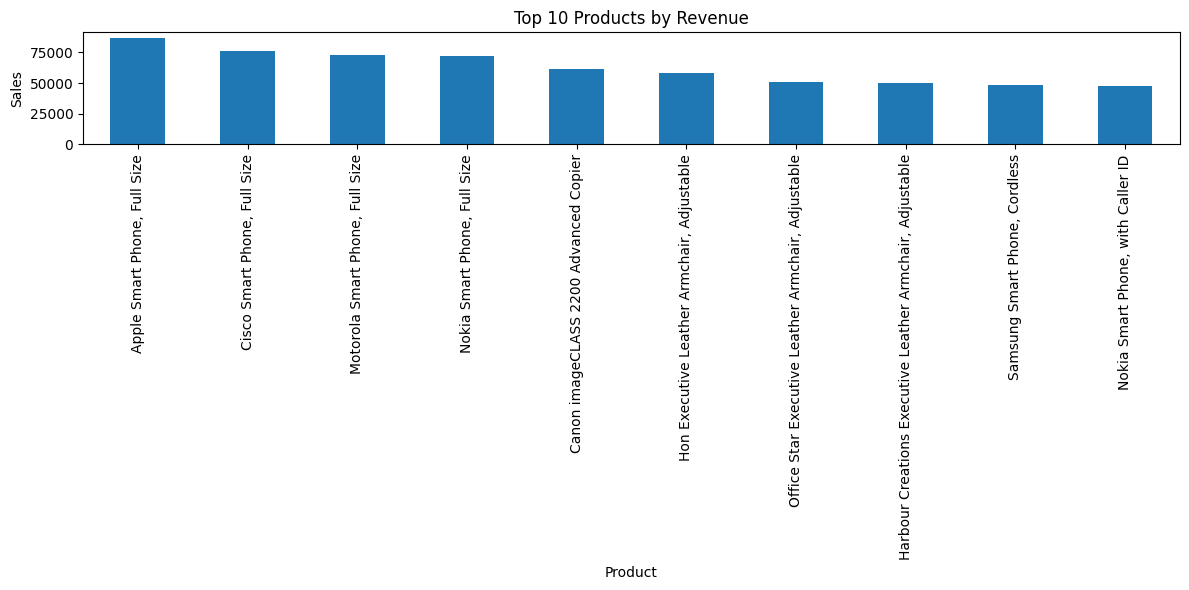

In [20]:
top_products = (
    df.groupby("product_name")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Sales")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("outputs/top_products_by_revenue.png", dpi=300)
plt.show()


#### 🔍Insights:
- The top 10 products contribute a significant portion of total revenue, indicating a strong revenue concentration.
- Smartphones dominate the top revenue-generating products, showing high customer demand for technology items.
- Apple, Cisco, Motorola, and Nokia products appear frequently, suggesting strong brand influence on sales.
- Focusing inventory management and marketing strategies on these top-performing products can significantly improve overall revenue.


### Q2. Best Performing Region


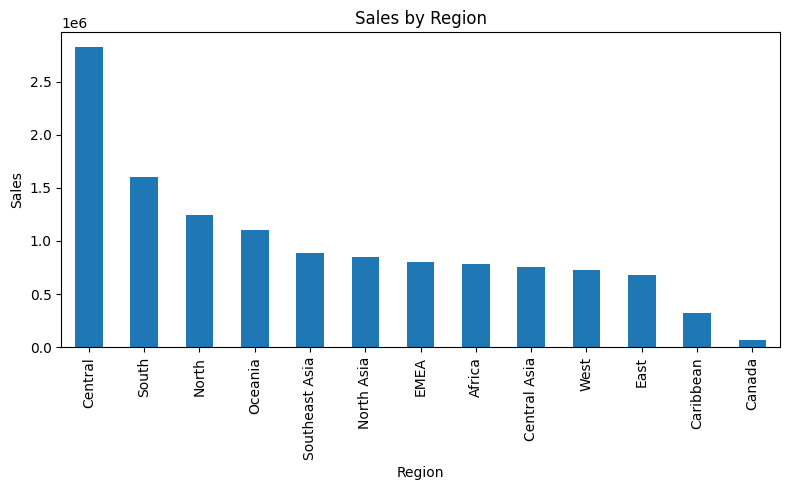

In [21]:
region_sales = df.groupby("region")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind="bar")
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.savefig("outputs/sales_by_region.png", dpi=300)
plt.show()


#### 🔍Insights:
- The Central region generates the highest sales, making it the best-performing region.
- South and North regions also contribute significantly to total revenue.
- Some regions such as Canada and the Caribbean show very low sales performance.
- Regional performance varies widely, indicating opportunities for targeted regional strategies.


### Q3. Monthly Sales Trend


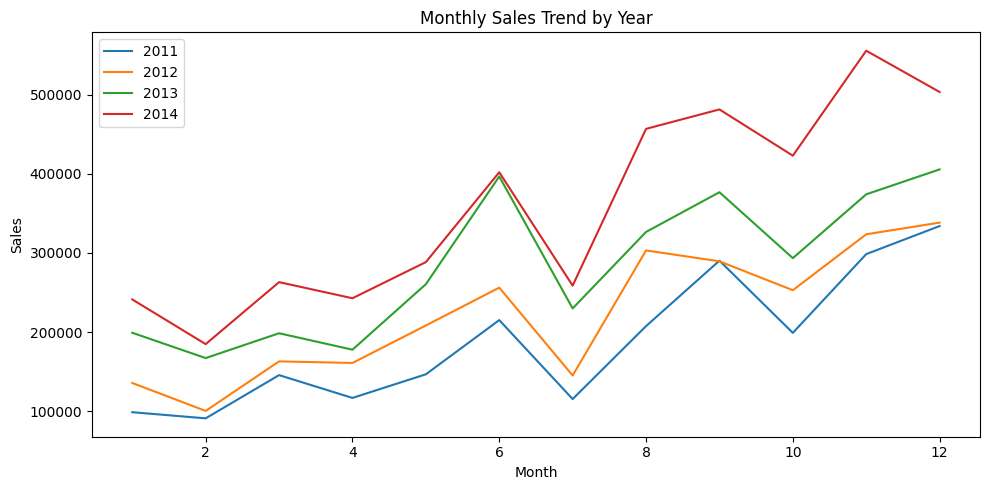

In [22]:
monthly_sales = df.groupby(["year", "month"])["sales"].sum().reset_index()

plt.figure(figsize=(10,5))
for year in monthly_sales["year"].unique():
    yearly_data = monthly_sales[monthly_sales["year"] == year]
    plt.plot(yearly_data["month"], yearly_data["sales"], label=str(year))

plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/monthly_sales_trend.png", dpi=300)
plt.show()


#### 🔍Insights:
- Sales show a consistent upward trend across years, indicating overall business growth.
- Peak sales are observed during mid-year (June) and year-end months (November–December).
- A noticeable dip in sales occurs around July, suggesting seasonal slowdown.
- The year 2014 records the highest sales across most months.


### Q4. Profit by Category


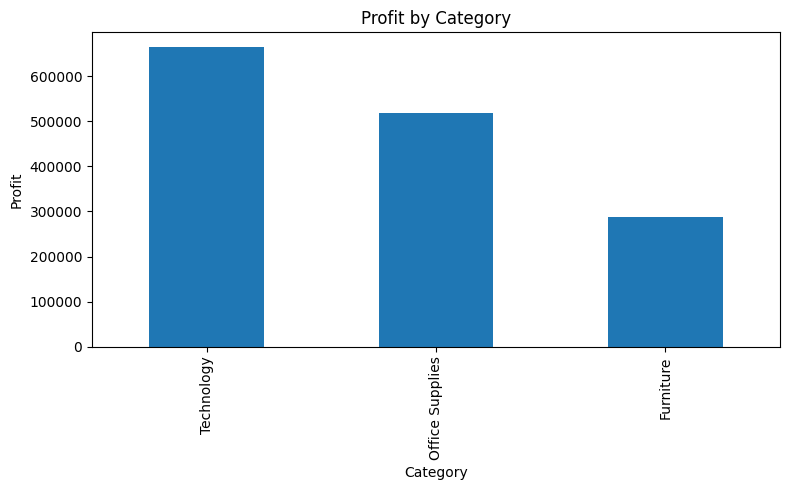

In [23]:
category_profit = df.groupby("category")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_profit.plot(kind="bar")
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig("outputs/profit_by_category.png", dpi=300)
plt.show()


#### 🔍Insights:
- Technology is the most profitable category, contributing the highest share of total profit.
- Office Supplies also generate strong profits, making it a stable category.
- Furniture shows comparatively low profitability despite sales, indicating higher costs or lower margins.
- Profitability varies significantly across categories.


### Q5. Impact of Discount on Profit


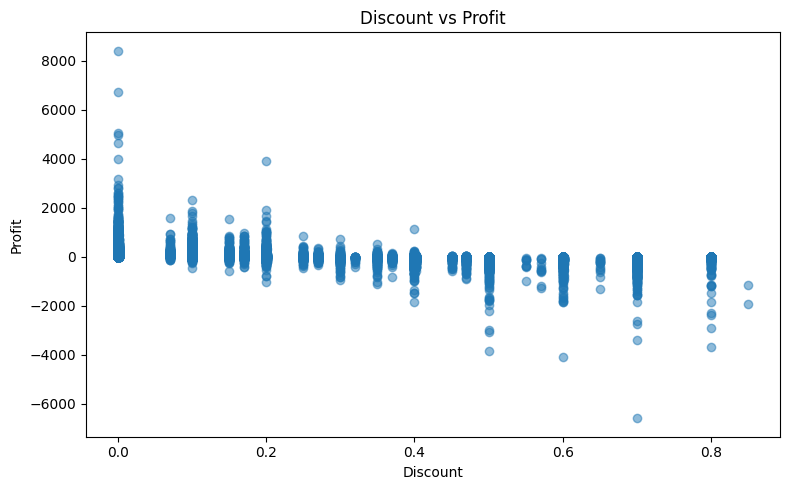

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df["discount"], df["profit"], alpha=0.5)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("outputs/discount_vs_profit.png", dpi=300)
plt.show()


#### 🔍Insights:
- Higher discounts are generally associated with lower profits.
- Orders with little or no discount tend to generate higher positive profit.
- Heavy discounting frequently leads to negative profit, indicating margin loss.
- Discount strategy has a significant impact on overall profitability.


## 🔹 STEP 7: Final Insights & Recommendations

### Final Business Insights & Recommendations

1. **Revenue Concentration in Top Products**  
   A small group of products - primarily smartphones and technology-related items-contributes a disproportionately large share of total revenue. Focusing inventory availability, promotions, and supply chain efficiency on these top-performing products can significantly boost overall sales.

2. **Strong Regional Performance Differences**  
   The Central region is the highest-performing region, followed by South and North regions. In contrast, regions such as Canada and the Caribbean show very low sales. This suggests the need for region-specific sales and marketing strategies.

3. **Clear Seasonal Sales Patterns**  
   Sales demonstrate strong seasonality, with peaks during mid-year (June) and year-end months (November–December). A noticeable decline occurs around July. Planning campaigns and stock levels around these seasonal trends can improve revenue consistency.

4. **Technology as the Most Profitable Category**  
   The Technology category generates the highest profit, followed by Office Supplies, while Furniture shows comparatively low profitability. This indicates that profit margins vary significantly across categories, and high-margin categories should be prioritized for growth.

5. **Negative Impact of High Discounts on Profitability**  
   The analysis shows a clear negative relationship between discount levels and profit. Orders with high discounts frequently result in low or negative profit. Controlled and targeted discounting is essential to protect profit margins.
